# Project Overview
By: Raquel Palumbo

Date: February 7th, 2024

Course: Data Science Cohort 121123 - Phase 1

### The Purpose
This project aims to make three business reccommendations for a company looking to expand into the aviation industry. This company is looking to acquire airplanes for both commerical and private usage. 

### The Data Set
The dataset used came from the National Transportation Safety Board. It contains information on aviation accidents from 1962 - 2023 in the US and international waters.

### The Approach
We will look at the passenger outcomes to make business reccomendations for the company.The variable we will use will be the number of uninjured passengers. We will look at this as the number of uninjured passengers, and also as the uninjured passengers as a percentage of the total number of passengers.

### The Questions
1. Which aircrafts should the company purchase?
2. Which regions should the company fly in?
3. Which purposes of flight should the company get involved in? 

# Import Libraries

Pandas and matplotlib were utilized in this project.

In [1]:
#import needed libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# Import and Clean the Data


In [2]:
#import the data
aviation_data = pd.read_csv('data/AviationData.csv', encoding = 'latin-1', low_memory=False)

In [3]:
#view the dataset
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/48,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/62,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/74,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/77,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00
4,20041105X01764,Accident,CHI79FA064,8/2/79,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#get information on the dataset
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The dataset contains data on 88,889 accidents.

# Clean the Data
### 1. Remove any unneccesary columns 
The following columns were removed as their data was not needed for this analysis:

    - Airport Code 
    - Air Carrier
    - Investigation Type
    - Latitude
    - Longitude
    - Accident Number
    - Publication Date
    - Event ID
    - Registration Number
    - FAR Description
    - Report Status
    - Amateur Built
    - Number of Engines

### 2. Elimate all rows where the aircraft category is not "Airplane"
At this time, the company only wants to work with airplanes.

### 3. Clean up the data on injuries
There are four columns that contain data on passenger injuries:

    - Total Fatal Injuries
    - Total Serious Injuries
    - Total Minor Injuries
    - Total Uninjured
    
We replaced all NaNs in these columns with zero. We assumed that is is likely that NaN represented an instance in which no passengers had that outcome. 

We also converted all values in these columns to integers to use in mathematical operations later in the analysis

### 4. Add columns
Columns for Total Injured Passengers and Number of Passengers were added. 

Any row that had no passengers (indicated by a zero in Number of Passengers) was dropped.

### 5. Clean the make column
We replaced names of makes that were duplicates. We also replaced Mcdonnell Douglass with Boeing, since that company is no longer in operation and was acquired by Boeing.

In [5]:
#remove columns that contain data we will not need
aviation_data = aviation_data.drop(['Airport.Code','Air.carrier','Investigation.Type','Latitude', 'Longitude','Accident.Number', 'Event.Id','Registration.Number', 'FAR.Description', 'Report.Status', 'Amateur.Built', 'Number.of.Engines'], axis =1)

In [6]:
#elimate data on aircraft other than airplanes
aviation_data.drop(aviation_data.loc[aviation_data['Aircraft.Category']!='Airplane'].index, inplace=True)
aviation_data = aviation_data.drop('Aircraft.Category', axis =1)

In [7]:
#clean up the data on injuries

#handle all missing data from the injuries columns
aviation_data.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].fillna(0)
aviation_data.drop(aviation_data.loc[aviation_data['Total.Fatal.Injuries']=='Boeing'].index, inplace=True)
aviation_data.drop(aviation_data.loc[aviation_data['Total.Fatal.Injuries']=='nan'].index, inplace=True)

#convert all injury counts to integers to use in mathematical operations
aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].astype(int)

#add a column for the total number of injured passsengers
aviation_data['Total.Injuries']=(aviation_data['Total.Fatal.Injuries']+aviation_data['Total.Minor.Injuries']+aviation_data['Total.Serious.Injuries']).astype(int)

#add a column for the total number of passengers
aviation_data['Num.Passengers']= aviation_data['Total.Injuries']+aviation_data['Total.Uninjured']

#drop any colums with no passengers
aviation_data.drop(aviation_data.loc[aviation_data['Num.Passengers']==0].index, inplace=True)

In [8]:
#clean up the make column

In [9]:
#drop rows with no data on make
aviation_data.dropna(subset = ['Make'], inplace = True)

#clean up the formatting of values
aviation_data['Make']=aviation_data['Make'].map(lambda x: x.title())

#reassign Mcdonnell Douglas to Boeing
aviation_data['Make'].replace('Mcdonnell Douglas', 'Boeing', inplace=True)
aviation_data['Make'].replace('Airbus Industrie', 'Airbus', inplace=True)

In [10]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26689 entries, 5 to 88886
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Date              26689 non-null  object
 1   Location                26684 non-null  object
 2   Country                 26682 non-null  object
 3   Airport.Name            18019 non-null  object
 4   Injury.Severity         26689 non-null  object
 5   Aircraft.damage         25852 non-null  object
 6   Make                    26689 non-null  object
 7   Model                   26664 non-null  object
 8   Engine.Type             23133 non-null  object
 9   Schedule                2574 non-null   object
 10  Purpose.of.flight       23778 non-null  object
 11  Total.Fatal.Injuries    26689 non-null  int64 
 12  Total.Serious.Injuries  26689 non-null  int64 
 13  Total.Minor.Injuries    26689 non-null  int64 
 14  Total.Uninjured         26689 non-null  int64 
 15  We

After cleaning the data, we are left with 26,689 entries to work with. 

# Finding the safest makes and models
The first reccomendation we will look to make is what aircrafts the company should purchase. 

We will look at the percentage of fatal injuries out of the total number of passengers for each make, and then for each model. 

First, we will find the five planes that have the most entries in the dataset. These are likely the planes that are flown the most commonly flown.

We first found the makes with the highest number of uninjured passengers.



Next, we added a column for Percentage of Uninjured Passengers. We then found which makes of had the highest percentage of uninjured passengers.

These same steps were then repeated for the models.

### Best Makes

In [11]:
#find the total of each passenger outcome for each make then get the 5 planes with the most passengers/data points
safest_makes = aviation_data[['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Num.Passengers']].groupby(['Make']).sum().nlargest(5, columns='Num.Passengers')

In [12]:
#find the make with the highest number of uninjured passengers
safest_makes.nlargest(5, columns='Total.Uninjured')

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Num.Passengers
Make,,,,,
Boeing,3309,1353,1242,99682,105586
Airbus,1668,210,107,24551,26536
Cessna,3059,1824,1500,10735,17118
Piper,1899,960,827,5522,9208
Embraer,319,123,59,4801,5302


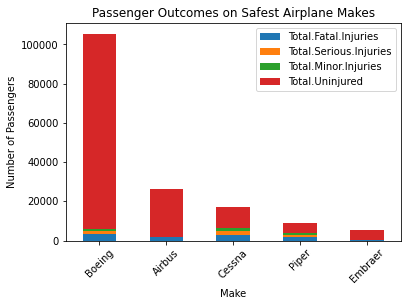

In [13]:
safest_makes.drop(['Num.Passengers'], axis =1).plot(kind='bar', stacked= True ,title = 'Passenger Outcomes on Safest Airplane Makes', ylabel='Number of Passengers', rot = 45)
plt.show()

***By number of uninjured passengers, Boeing is the best choice***

In [14]:
#add a column for the percentage of uninjured passengers
safest_makes['Percentage.Uninjured'] = ((safest_makes['Total.Uninjured']/safest_makes['Num.Passengers'])*100)

In [15]:
#convert all columns to percentages
safest_makes['Total.Fatal.Injuries'] = ((safest_makes['Total.Fatal.Injuries']/safest_makes['Num.Passengers'])*100)
safest_makes['Total.Serious.Injuries'] = ((safest_makes['Total.Serious.Injuries']/safest_makes['Num.Passengers'])*100)
safest_makes['Total.Minor.Injuries'] = ((safest_makes['Total.Minor.Injuries']/safest_makes['Num.Passengers'])*100)

In [16]:
#rename the columns
safest_makes.rename(columns={'Total.Fatal.Injuries':'Percentage.Fatal.Injuries', 'Total.Serious.Injuries':'Percentage.Serious.Injuries', 'Total.Minor.Injuries':'Percentage.Minor.Injuries'},inplace=True)

safest_makes= safest_makes.drop(['Total.Uninjured', 'Num.Passengers'], axis=1).sort_values('Percentage.Uninjured', ascending=False)
safest_makes.round(2)

,Percentage.Fatal.Injuries,Percentage.Serious.Injuries,Percentage.Minor.Injuries,Percentage.Uninjured
Make,,,,
Boeing,3.13,1.28,1.18,94.41
Airbus,6.29,0.79,0.40,92.52
Embraer,6.02,2.32,1.11,90.55
Cessna,17.87,10.66,8.76,62.71
Piper,20.62,10.43,8.98,59.97


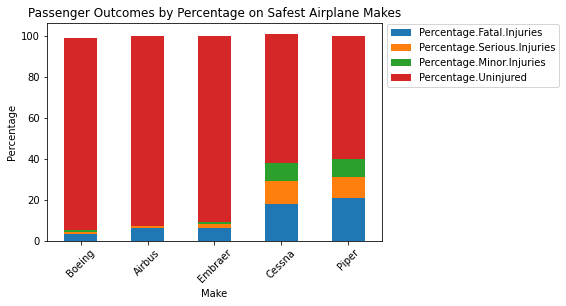

In [17]:
#plot the passenger outcomes by percentage
safest_makes.round().plot(kind='bar', stacked=True, title= 'Passenger Outcomes by Percentage on Safest Airplane Makes', ylabel='Percentage', rot=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85))
plt.show()

***Boeing also is the best option by percentage of uninjured passengers***

### Best Models

In [18]:
#find the total of each passenger outcome for each make then get the 5 planes with the most passengers/data points
safest_models = aviation_data[['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Num.Passengers']].groupby(['Make', 'Model']).sum().nlargest(5, columns='Num.Passengers')
safest_models

Total.Fatal.Injuries  Total.Serious.Injuries  \
Make   Model                                                 
Boeing 737                    1341                     339   
       777                       0                       6   
       767                     128                     110   
Airbus A320                    283                      11   
       A330                    331                      19   

              Total.Minor.Injuries  Total.Uninjured  Num.Passengers  
Make   Model                                                         
Boeing 737                      83            20529           22292  
       777                      22             8525            8553  
       767                      21             5521            5780  
Airbus A320                     13             3358            3665  
       A330                     24             2991            3365

In [19]:
#find the model with the highest number of uninjured passengers
safest_models.nlargest(5, columns='Total.Uninjured')

Total.Fatal.Injuries  Total.Serious.Injuries  \
Make   Model                                                 
Boeing 737                    1341                     339   
       777                       0                       6   
       767                     128                     110   
Airbus A320                    283                      11   
       A330                    331                      19   

              Total.Minor.Injuries  Total.Uninjured  Num.Passengers  
Make   Model                                                         
Boeing 737                      83            20529           22292  
       777                      22             8525            8553  
       767                      21             5521            5780  
Airbus A320                     13             3358            3665  
       A330                     24             2991            3365

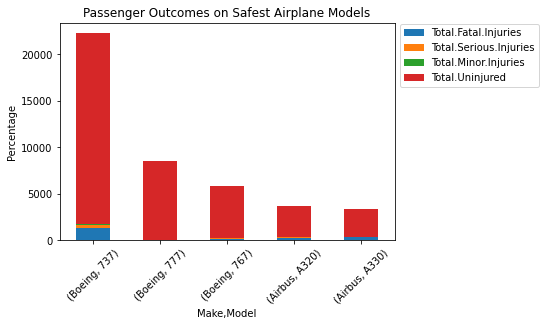

In [20]:
safest_models.drop('Num.Passengers', axis = 1).plot(kind='bar', stacked=True, title= 'Passenger Outcomes on Safest Airplane Models', ylabel='Percentage', rot =45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85))
plt.show()

In [21]:
#add a column for the percentage of uninjured passengers
safest_models['Percentage.Uninjured'] = ((safest_models['Total.Uninjured']/safest_models['Num.Passengers'])*100)

In [22]:
#convert all columns to percentages
safest_models['Total.Fatal.Injuries'] = ((safest_models['Total.Fatal.Injuries']/safest_models['Num.Passengers'])*100)
safest_models['Total.Serious.Injuries'] = ((safest_models['Total.Serious.Injuries']/safest_models['Num.Passengers'])*100)
safest_models['Total.Minor.Injuries'] = ((safest_models['Total.Minor.Injuries']/safest_models['Num.Passengers'])*100)

In [23]:
#rename the columns
safest_models.rename(columns={'Total.Fatal.Injuries':'Percentage.Fatal.Injuries', 'Total.Serious.Injuries':'Percentage.Serious.Injuries', 'Total.Minor.Injuries':'Percentage.Minor.Injuries'},inplace=True)

safest_models= safest_models.drop(['Total.Uninjured', 'Num.Passengers'], axis=1).sort_values('Percentage.Uninjured', ascending=False)
safest_models.round(2)

Percentage.Fatal.Injuries  Percentage.Serious.Injuries  \
Make   Model                                                           
Boeing 777                         0.00                         0.07   
       767                         2.21                         1.90   
       737                         6.02                         1.52   
Airbus A320                        7.72                         0.30   
       A330                        9.84                         0.56   

              Percentage.Minor.Injuries  Percentage.Uninjured  
Make   Model                                                   
Boeing 777                         0.26                 99.67  
       767                         0.36                 95.52  
       737                         0.37                 92.09  
Airbus A320                        0.35                 91.62  
       A330                        0.71                 88.89

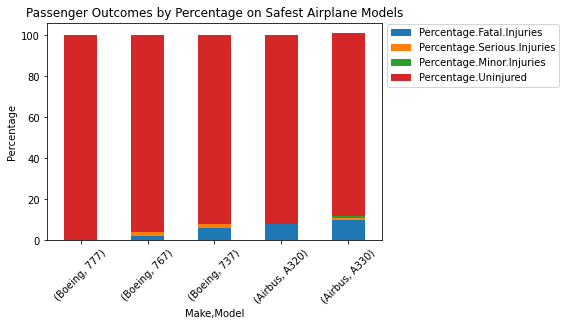

In [24]:
#plot the passenger outcomes by percentages
safest_models.round().plot(kind='bar', stacked=True, title= 'Passenger Outcomes by Percentage on Safest Airplane Models', ylabel='Percentage', rot =45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85))
plt.show()

***The safest model for the company to purchase would be a Boeing 777.***

# Finding the best region to fly in
When finding the best region to fly in, we first looked to see which country we had the most data on, which was the US. We decided to focus on this country.

We then created a column for the state for each entry.

Then, using the regions of the US as defined by National Geographic, a region was assigned to each entry as well in a newly created Region column.

The same approach used in finding the safest make and model was then used.

In [25]:
#check which country we have the most data on
aviation_data['Country'].value_counts()

United States               24114
Brazil                        225
Canada                        160
Mexico                        160
United Kingdom                141
                            ...  
Malawi                          1
Mauritania                      1
Iraq                            1
Estonia                         1
Turks and Caicos Islands        1
Name: Country, Length: 153, dtype: int64

In [26]:
regional_aviation_data = aviation_data

#add a column for the states
aviation_data['State']= aviation_data['Location'].str[-2:]

In [27]:
#define US regions using the regions defined by national geographic on https://education.nationalgeographic.org/resource/united-states-regions/
west =['WA', 'OR', 'CA', 'NV', 'UT', 'ID', 'MT', 'WY', 'CO', 'AK', 'HI']
southwest = ['AZ', 'NM', 'OK', 'TX']
midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'WI', 'IL', 'IN', 'MI', 'OH']
southeast = ['AR', 'LA', 'MS', 'AL', 'TN','KY', 'WV', 'MD', 'DC', 'VA', 'NC', 'SC', 'GA', 'FL', 'DE']
northeast = ['PA', 'NY', 'NJ', 'RI', 'MA', 'NH', 'VT', 'ME', 'CT']

#check that all 50 states were accounted for
assert len(west)+len(southwest)+len(northeast)+len(southeast)+len(midwest) == 50

In [28]:
#assign a region to each state
for index, row in regional_aviation_data.iterrows():
    if row['State'] in west:
        regional_aviation_data.loc[index, 'Region'] = 'West'
    elif row['State'] in southwest:
        regional_aviation_data.loc[index, 'Region'] = 'Southwest'
    elif row['State'] in midwest:
        regional_aviation_data.loc[index, 'Region'] = 'Midwest'
    elif row['State'] in southeast:
        regional_aviation_data.loc[index, 'Region'] = 'Southeast'
    elif row['State'] in northeast:
        regional_aviation_data.loc[index, 'Region'] = 'Northeast'

In [29]:
regional_aviation_data = regional_aviation_data.groupby('Region').sum()
regional_aviation_data = regional_aviation_data.sort_values('Total.Uninjured', ascending=False)
regional_aviation_data

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Num.Passengers
Region,,,,,,
West,2295,2051,1536,28514,5882,34396
Southeast,1829,1468,1143,26082,4440,30522
Midwest,1009,882,782,16686,2673,19359
Northeast,646,625,502,15222,1773,16995
Southwest,1072,767,722,9726,2561,12287


In [30]:
#define injury data
injury_data = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

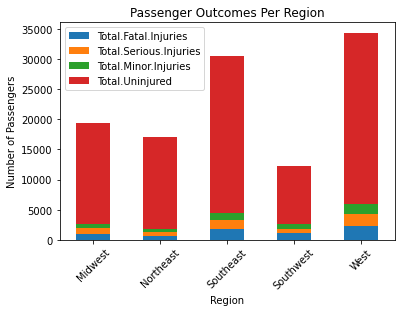

In [31]:
regional_aviation_data.groupby(['Region'])[injury_data].sum().plot(kind='bar', stacked = True, title='Passenger Outcomes Per Region', ylabel= 'Number of Passengers', rot=45)
plt.show()

***By number of uninjured passengers, the West is the best area to fly***

In [32]:
#convert all columns to percentages
regional_aviation_data['Total.Fatal.Injuries'] = ((regional_aviation_data['Total.Fatal.Injuries']/regional_aviation_data['Num.Passengers'])*100)
regional_aviation_data['Total.Serious.Injuries'] = ((regional_aviation_data['Total.Serious.Injuries']/regional_aviation_data['Num.Passengers'])*100)
regional_aviation_data['Total.Minor.Injuries'] = ((regional_aviation_data['Total.Serious.Injuries']/regional_aviation_data['Num.Passengers'])*100)
regional_aviation_data['Total.Uninjured'] = ((regional_aviation_data['Total.Uninjured']/regional_aviation_data['Num.Passengers'])*100)

#rename the columns
regional_aviation_data.rename(columns={'Total.Fatal.Injuries':'Percentage.Fatal.Injuries', 'Total.Serious.Injuries':'Percentage.Serious.Injuries', 'Total.Minor.Injuries':'Percentage.Minor.Injuries', 'Total.Uninjured':'Percentage.Uninjured'},inplace=True)

In [33]:
#drop number of passengers column
regional_aviation_data= regional_aviation_data.drop(['Num.Passengers'], axis=1).sort_values('Percentage.Uninjured', ascending=False)

In [34]:
regional_aviation_data.round(2)

,Percentage.Fatal.Injuries,Percentage.Serious.Injuries,Percentage.Minor.Injuries,Percentage.Uninjured,Total.Injuries
Region,,,,,
Northeast,3.80,3.68,0.02,89.57,1773
Midwest,5.21,4.56,0.02,86.19,2673
Southeast,5.99,4.81,0.02,85.45,4440
West,6.67,5.96,0.02,82.90,5882
Southwest,8.72,6.24,0.05,79.16,2561


In [35]:
#plot the regional passenger outcomes by percentage
#regional_aviation_data.drop('Total.Injuries', axis=1, inplace=True)

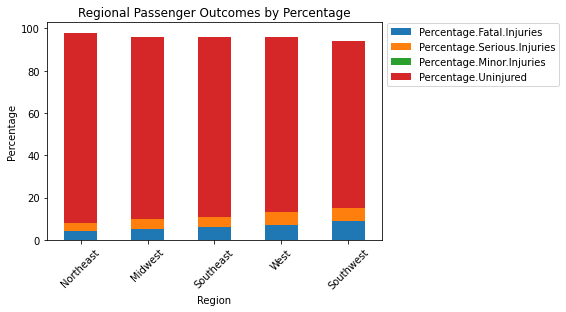

<Figure size 2880x1728 with 0 Axes>

In [36]:
#plot the passenger outcomes by percentages
regional_aviation_data.drop('Total.Injuries', axis =1).round().plot(kind='bar', stacked=True, title= 'Regional Passenger Outcomes by Percentage', ylabel='Percentage', rot = 45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85))
plt.figure(figsize=(40, 24))
plt.savefig('Regional Passenger Outcomes By Percentage')
plt.show()

***By percentage of uninjured passengers, the best region to fly in is the Northeast***

# Finding the best flight purposes
For this section we will look at what flight purposes the 

In [37]:
###find the aircraft usage that is the most risky

In [38]:
aviation_data_by_purpose = aviation_data.groupby('Purpose.of.flight').sum()

In [39]:
#drop the unknown purpose
aviation_data_by_purpose.drop(index='Unknown', inplace=True)

In [40]:
safest_purpose = aviation_data_by_purpose.sort_values('Total.Uninjured', ascending=False).nlargest(5, columns='Total.Uninjured')
safest_purpose

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Num.Passengers
Purpose.of.flight,,,,,,
Personal,5347,3530,3117,16816,11994,28810
Instructional,542,537,446,3958,1525,5483
Business,406,163,164,1225,733,1958
Aerial Application,154,167,131,639,452,1091
Skydiving,217,81,46,524,344,868


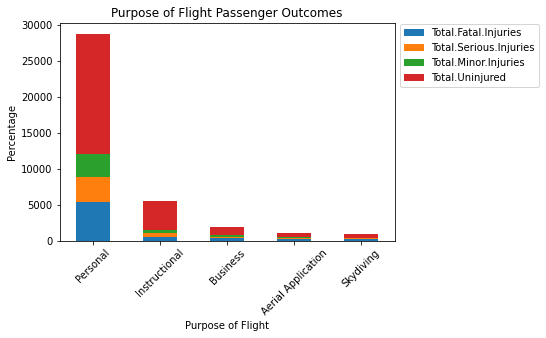

In [41]:
safest_purpose.drop(['Total.Injuries', 'Num.Passengers'], axis =1).plot(kind='bar', stacked=True, title= 'Purpose of Flight Passenger Outcomes', ylabel='Percentage', xlabel='Purpose of Flight', rot = 45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85))
plt.show()

In [42]:
#convert all columns to percentages
aviation_data_by_purpose['Total.Fatal.Injuries'] = ((aviation_data_by_purpose['Total.Fatal.Injuries']/aviation_data_by_purpose['Num.Passengers'])*100)
aviation_data_by_purpose['Total.Serious.Injuries'] = ((aviation_data_by_purpose['Total.Serious.Injuries']/aviation_data_by_purpose['Num.Passengers'])*100)
aviation_data_by_purpose['Total.Minor.Injuries'] = ((aviation_data_by_purpose['Total.Minor.Injuries']/aviation_data_by_purpose['Num.Passengers'])*100)
aviation_data_by_purpose['Total.Uninjured'] = ((aviation_data_by_purpose['Total.Uninjured']/aviation_data_by_purpose['Num.Passengers'])*100)

In [43]:
#drop unneeded columns
aviation_data_by_purpose.drop(['Total.Injuries', 'Num.Passengers'], axis = 1, inplace = True)

In [44]:
safest_flight_purposes = aviation_data_by_purpose.sort_values('Total.Uninjured', ascending=False).nlargest(5, columns='Total.Uninjured')
safest_flight_purposes.round(2)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Purpose.of.flight,,,,
Public Aircraft - Federal,9.91,8.11,6.31,75.68
PUBS,0.00,0.00,25.00,75.00
Executive/corporate,15.57,7.86,3.57,73.00
Instructional,9.89,9.79,8.13,72.19
Positioning,17.41,7.41,5.17,70.00


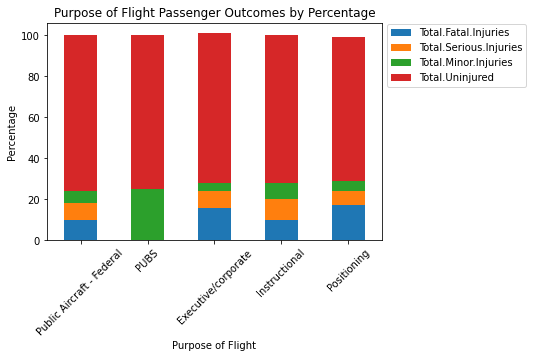

In [45]:
#plot the passenger outcomes by percentages
safest_flight_purposes.round().plot(kind='bar', stacked=True, title= 'Purpose of Flight Passenger Outcomes by Percentage', ylabel='Percentage', xlabel='Purpose of Flight', rot = 45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85))
plt.show()

***The best purpose of flight to get involved with would be be Public Aircraft - Federal. This, and PUBS seem unpractical due to barriers to entry. So Executive/Corporate is likely the best purpose of flight.***

# Conclusions

1. Which aircrafts should the company purchase? ***Boeing 737***
2. Which regions should the company fly in? ***Northeast***
3. Which purposes of flight should the company get involved in? ***Executive/Corporate***

# Limitations

- This dataset only contains information on planes that have had accidents
- Data has a range of about 60 years, older data may not be relevant as technology has changed a lot since then
- Just because something is the best, doesn't mean it's possible for the company


# Next Steps
- Look into data on overall perfomance of aircraft by bringing in data on planes that have not crashed as well
- Look at the reccommendations and evaluate if any are impossible/impractical for the company
- Perform a similar analysis on more recent years